In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [60]:
df=pd.read_csv(r"D:\Dinesh Master's\ALY6150 Healthcare data and applications\mortality_rate.csv")

C:\Users\DINESH\AppData\Local\Temp\ipykernel_22208\2737401978.py:1: DtypeWarning: Columns (12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"D:\Dinesh Master's\ALY6150 Healthcare data and applications\mortality_rate.csv")


In [61]:
df.head()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,72.4,44.2,111.8,16.2
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,108.3,67.8,163.9,23.1
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,352.4,237.7,503.0,64.3
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,137.9 (Unreliable),71.3,240.9,39.8
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,313.5 (Unreliable),150.3,576.5,99.1


In [62]:
# To check for the missing values
df.isnull().sum()

ICD Chapter                                 0
ICD Chapter Code                            0
Year                                        0
Year Code                                   0
State                                       0
State Code                                  0
2013 Urbanization                           0
2013 Urbanization Code                      0
Gender                                      0
Age Group                                   0
Age Group Code                              0
Deaths                                      0
Population                                  0
Crude Rate                                  0
Crude Rate Lower 95% Confidence Interval    0
Crude Rate Upper 95% Confidence Interval    0
Crude Rate Standard Error                   0
dtype: int64

In [63]:
# Shape of the dataset
df.shape

(419356, 17)

In [64]:
# Remove duplicates
df = df.drop_duplicates()

In [65]:
#To recheck the shape again
df.shape

(419356, 17)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419356 entries, 0 to 419355
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   ICD Chapter                               419356 non-null  object
 1   ICD Chapter Code                          419356 non-null  object
 2   Year                                      419356 non-null  int64 
 3   Year Code                                 419356 non-null  int64 
 4   State                                     419356 non-null  object
 5   State Code                                419356 non-null  int64 
 6   2013 Urbanization                         419356 non-null  object
 7   2013 Urbanization Code                    419356 non-null  int64 
 8   Gender                                    419356 non-null  object
 9   Age Group                                 419356 non-null  object
 10  Age Group Code                  

In [67]:
# Remove additional text from 'Crude Rate' column
df['Crude Rate'] = df['Crude Rate'].apply(lambda x: re.sub(r'\D+', '', str(x)))

# Convert 'Crude Rate' column to numeric
df['Crude Rate'] = pd.to_numeric(df['Crude Rate'])

In [68]:
df.head()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,724.0,44.2,111.8,16.2
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,1083.0,67.8,163.9,23.1
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,3524.0,237.7,503.0,64.3
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,1379.0,71.3,240.9,39.8
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,3135.0,150.3,576.5,99.1


In [73]:
# Specify the columns to fix decimal precision
columns_to_fix = ['Crude Rate', 'Population', 'Crude Rate Lower 95% Confidence Interval',
                  'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error']

# Replace 'Not Applicable' values with NaN
df[columns_to_fix] = df[columns_to_fix].replace('Not Applicable', np.nan)

# Replace non-finite values (NaN and inf) with a default value (e.g., 0)
df[columns_to_fix] = df[columns_to_fix].replace([np.inf, -np.inf, np.nan], 0)

# Fix decimal precision and round off for specified columns
df[columns_to_fix] = df[columns_to_fix].round(0).astype(int)

In [74]:
df.head()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,724,44,112,16
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,1083,68,164,23
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,3524,238,503,64
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,1379,71,241,40
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,3135,150,576,99


In [75]:
# Define a function to categorize age groups
def categorize_age_group(age_group):
    if re.match(r'^\d+-\d+$', age_group):  # Check if the format is "x-y"
        lower, upper = age_group.split('-')
        return f"{lower}-{upper}"
    elif re.match(r'^\d+\+$', age_group):  # Check if the format is "x+"
        return f"{age_group[:-1]} and above"
    else:
        return "Unknown"

# Create a new column with the categorized age groups
df['Age Group Category'] = df['Age Group Code'].apply(categorize_age_group)

# Print the updated DataFrame
print(df[['Age Group Code', 'Age Group Category']])

       Age Group Code Age Group Category
0               65-74              65-74
1               75-84              75-84
2                 85+       85 and above
3               75-84              75-84
4                 85+       85 and above
...               ...                ...
419351          25-34              25-34
419352          35-44              35-44
419353          45-54              45-54
419354          55-64              55-64
419355          65-74              65-74

[419356 rows x 2 columns]


In [76]:
df.head()

,ICD Chapter,ICD Chapter Code,Year,Year Code,State,State Code,2013 Urbanization,2013 Urbanization Code,Gender,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Group Category
0,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,65-74 years,65-74,20,27625,724,44,112,16,65-74
1,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,75-84 years,75-84,22,20323,1083,68,164,23,75-84
2,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Central Metro,1,Female,85+ years,85+,30,8514,3524,238,503,64,85 and above
3,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,75-84 years,75-84,12,8702,1379,71,241,40,75-84
4,Certain infectious and parasitic diseases,A00-B99,1999,1999,Alabama,1,Large Fringe Metro,2,Female,85+ years,85+,10,3190,3135,150,576,99,85 and above


In [77]:
df["2013 Urbanization"].value_counts()

Medium Metro               85762
Large Central Metro        75092
Large Fringe Metro         70721
Micropolitan (Nonmetro)    66021
Small Metro                64692
NonCore (Nonmetro)         57068
Name: 2013 Urbanization, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419356 entries, 0 to 419355
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   ICD Chapter                               419356 non-null  object
 1   ICD Chapter Code                          419356 non-null  object
 2   Year                                      419356 non-null  int64 
 3   Year Code                                 419356 non-null  int64 
 4   State                                     419356 non-null  object
 5   State Code                                419356 non-null  int64 
 6   2013 Urbanization                         419356 non-null  object
 7   2013 Urbanization Code                    419356 non-null  int64 
 8   Gender                                    419356 non-null  object
 9   Age Group                                 419356 non-null  object
 10  Age Group Code                  

In [79]:
# Dropping unecessary features

columns_to_drop=['ICD Chapter Code','Year Code','State Code','2013 Urbanization Code','Age Group','Age Group Code',
                'Crude Rate Lower 95% Confidence Interval','Crude Rate Upper 95% Confidence Interval']

# Drop the specified columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)


In [80]:
df.head()

,ICD Chapter,Year,State,2013 Urbanization,Gender,Deaths,Population,Crude Rate,Crude Rate Standard Error,Age Group Category
0,Certain infectious and parasitic diseases,1999,Alabama,Large Central Metro,Female,20,27625,724,16,65-74
1,Certain infectious and parasitic diseases,1999,Alabama,Large Central Metro,Female,22,20323,1083,23,75-84
2,Certain infectious and parasitic diseases,1999,Alabama,Large Central Metro,Female,30,8514,3524,64,85 and above
3,Certain infectious and parasitic diseases,1999,Alabama,Large Fringe Metro,Female,12,8702,1379,40,75-84
4,Certain infectious and parasitic diseases,1999,Alabama,Large Fringe Metro,Female,10,3190,3135,99,85 and above


In [82]:
df.describe()

,Year,Deaths,Population,Crude Rate,Crude Rate Standard Error
count,419356.000000,419356.000000,4.193560e+05,419356.000000,419356.000000
mean,2007.672848,102.950686,7.447245e+04,4584.645614,53.688816
std,5.176686,277.150864,1.506793e+05,10234.492014,97.205564
min,1999.000000,10.000000,0.000000e+00,0.000000,0.000000
25%,2003.000000,18.000000,1.216700e+04,401.000000,9.000000
50%,2008.000000,35.000000,2.991700e+04,1186.000000,22.000000
75%,2012.000000,89.000000,6.875100e+04,4026.000000,59.000000
max,2016.000000,15627.000000,2.025259e+06,141026.000000,4252.000000


In [83]:
# Specify the columns to check for outliers
columns_to_check = ['Deaths']

# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[columns_to_check] < lower_fence) | (df[columns_to_check] > upper_fence)).any(axis=1)

# Print the rows with outliers
print(df[outliers])

                                       ICD Chapter  Year       State  \
165      Certain infectious and parasitic diseases  1999    Illinois   
370      Certain infectious and parasitic diseases  1999  New Jersey   
371      Certain infectious and parasitic diseases  1999  New Jersey   
382      Certain infectious and parasitic diseases  1999    New York   
383      Certain infectious and parasitic diseases  1999    New York   
...                                            ...   ...         ...   
419163  External causes of morbidity and mortality  2016    Virginia   
419164  External causes of morbidity and mortality  2016    Virginia   
419165  External causes of morbidity and mortality  2016    Virginia   
419166  External causes of morbidity and mortality  2016    Virginia   
419167  External causes of morbidity and mortality  2016    Virginia   

          2013 Urbanization  Gender  Deaths  Population  Crude Rate  \
165     Large Central Metro  Female     231       54258        4

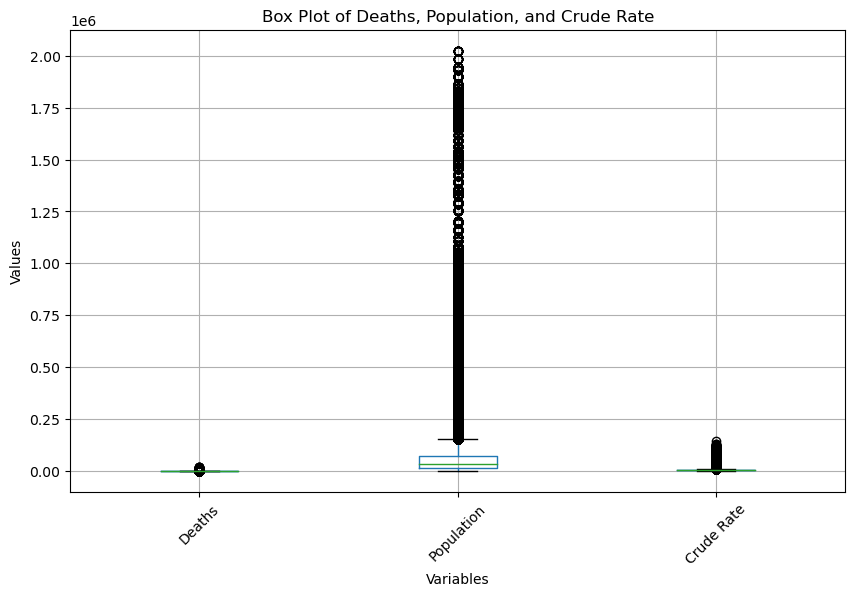

In [50]:
# Specify the columns for box plot
columns_to_plot = ['Deaths', 'Population', 'Crude Rate']

# Create a box plot
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box Plot of Deaths, Population, and Crude Rate')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

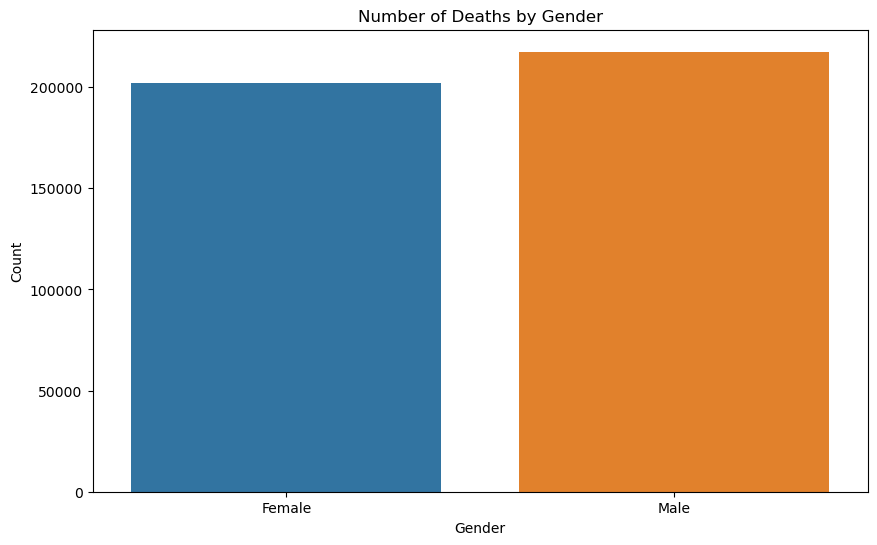

In [87]:
# Bar plot of Deaths by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

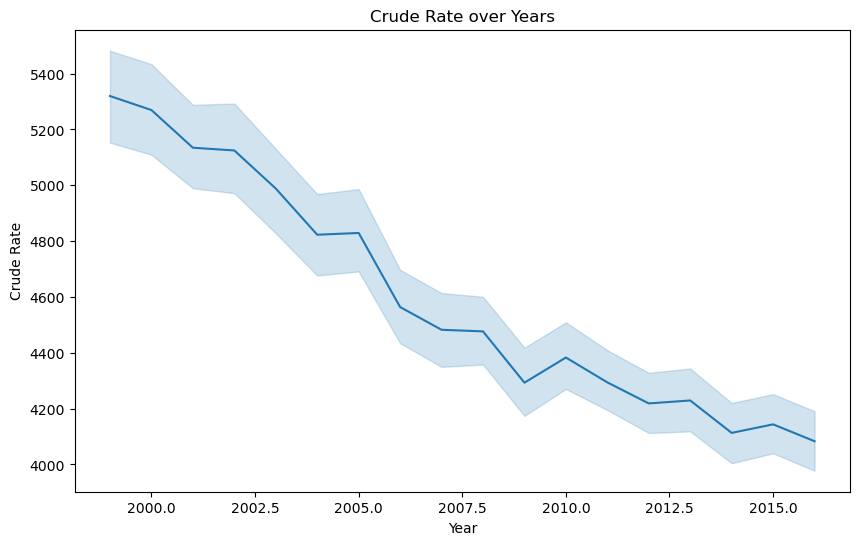

In [86]:
# Line plot of Crude Rate over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Crude Rate', data=df)
plt.title('Crude Rate over Years')
plt.xlabel('Year')
plt.ylabel('Crude Rate')
plt.show()

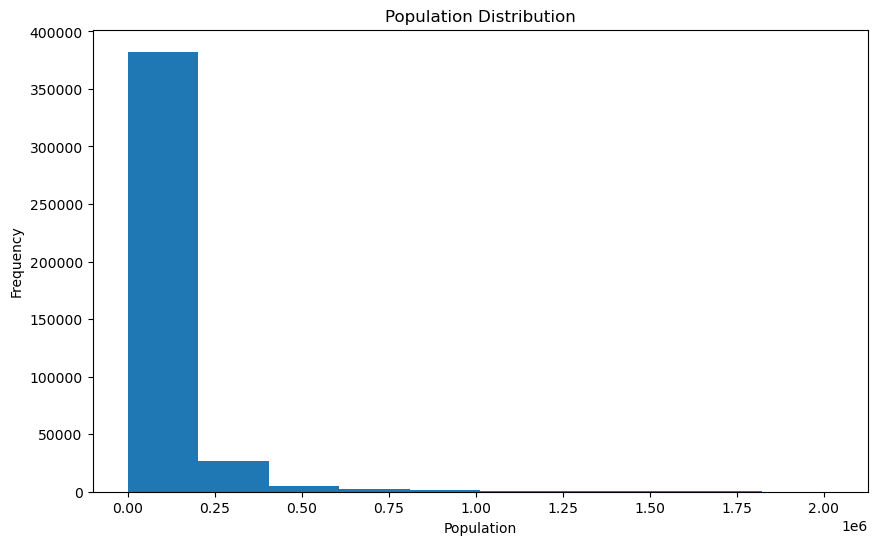

In [88]:
# Plot 3: Histogram of Population
plt.figure(figsize=(10, 6))
plt.hist(df['Population'], bins=10)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

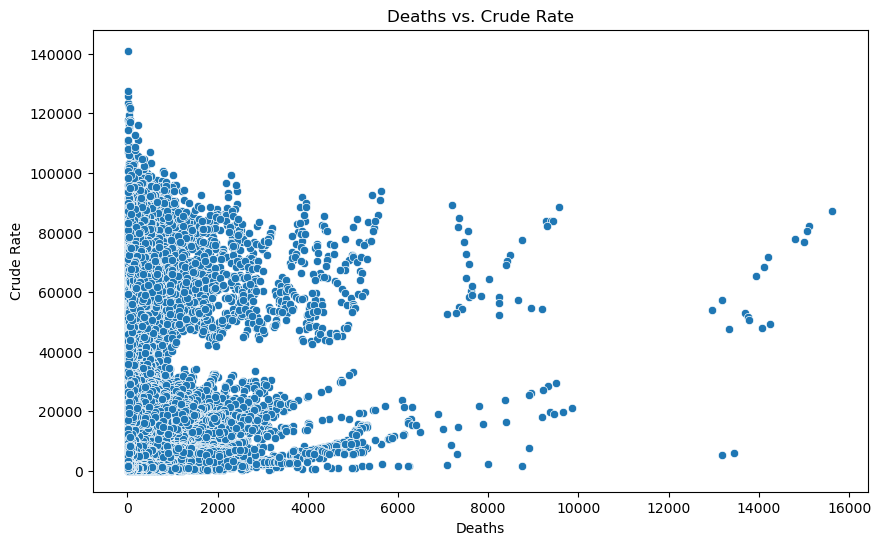

In [89]:
#  Scatter plot of Deaths vs. Crude Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Deaths', y='Crude Rate', data=df)
plt.title('Deaths vs. Crude Rate')
plt.xlabel('Deaths')
plt.ylabel('Crude Rate')
plt.show()

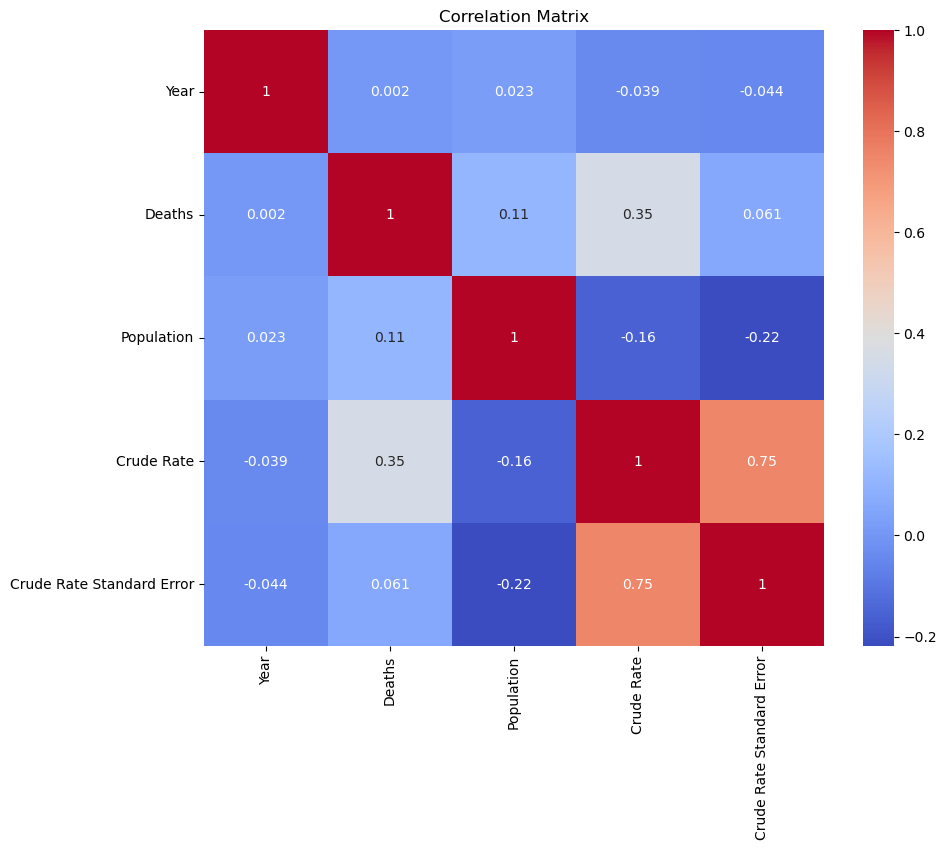

In [90]:
# Heatmap of Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

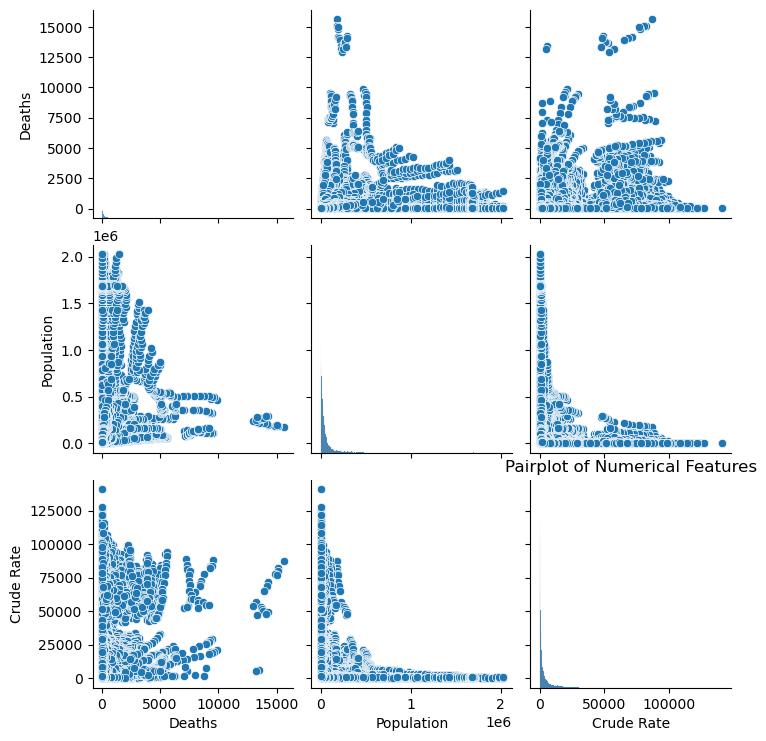

In [91]:
#  Pairplot of select numerical features
numeric_features = ['Deaths', 'Population', 'Crude Rate']
sns.pairplot(df[numeric_features])
plt.title('Pairplot of Numerical Features')
plt.show()

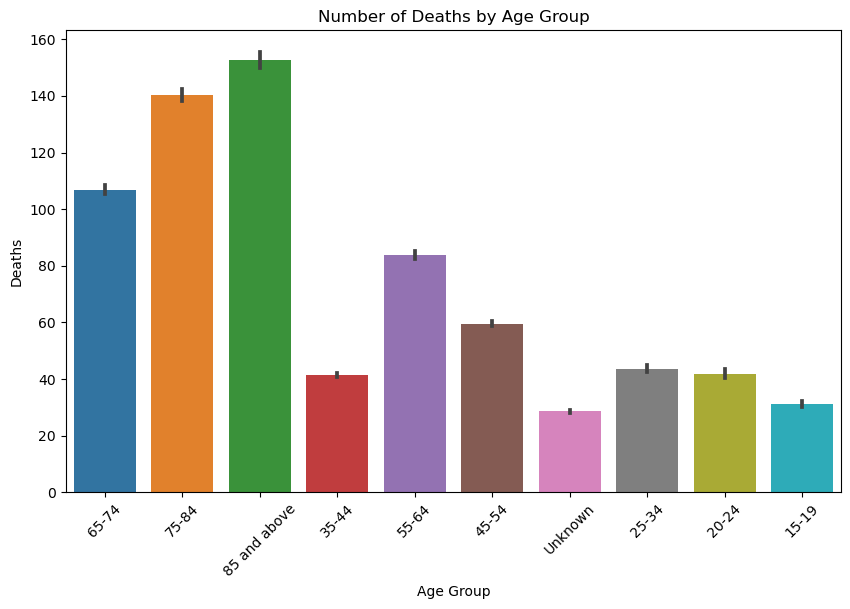

In [93]:
# Plot 2: Bar plot of Deaths by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group Category', y='Deaths', data=df)
plt.title('Number of Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

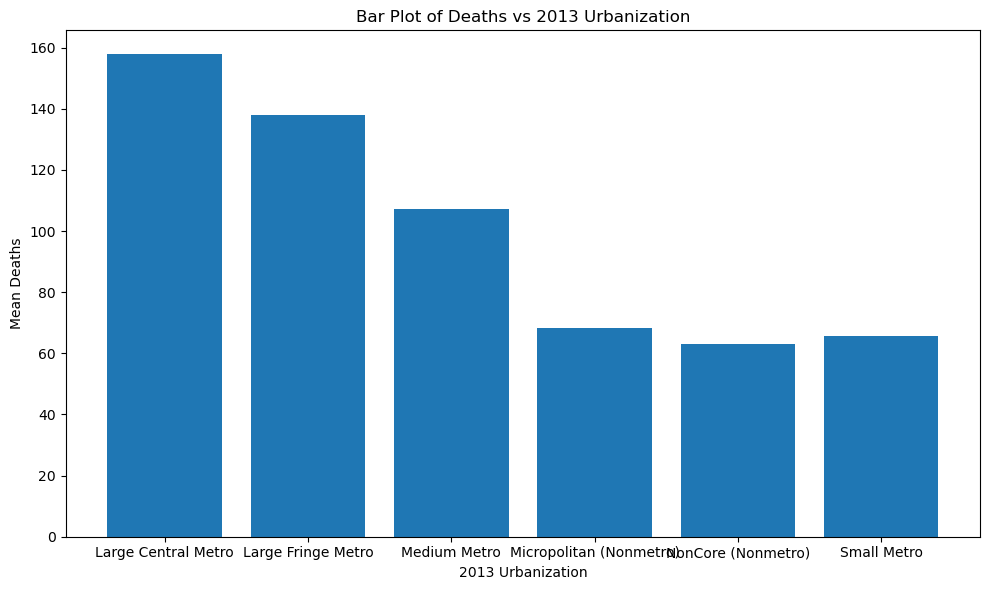

In [96]:
# Group the data by '2013 urbanization' and calculate the mean of 'deaths' for each group
grouped_df = df.groupby('2013 Urbanization')['Deaths'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['2013 Urbanization'], grouped_df['Deaths'])
plt.xlabel('2013 Urbanization')
plt.ylabel('Mean Deaths')
plt.title('Bar Plot of Deaths vs 2013 Urbanization')

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

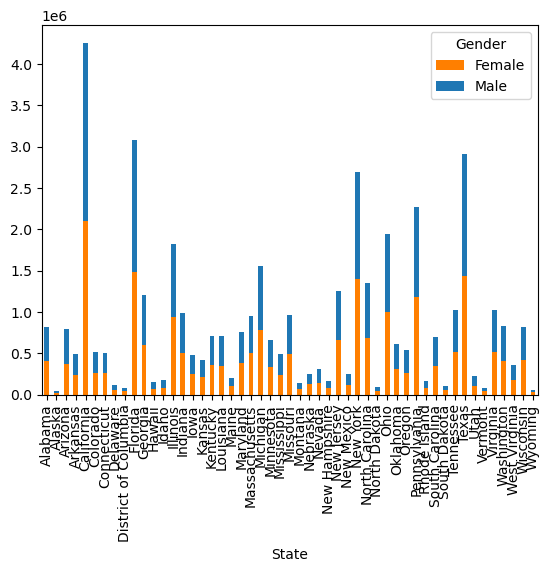

<Figure size 1200x600 with 0 Axes>

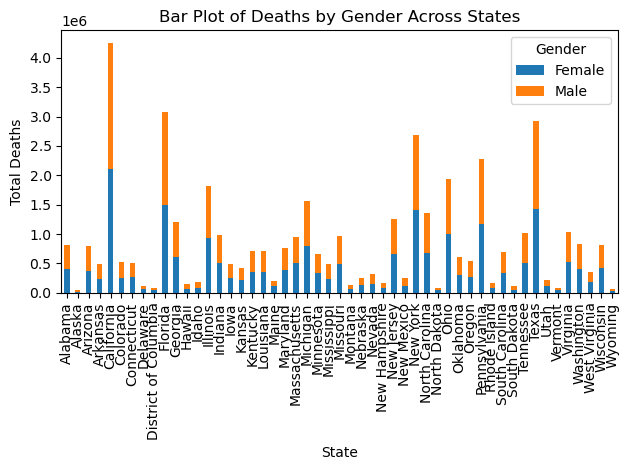

In [98]:
# Group the data by 'state' and 'gender' and calculate the sum of 'deaths' for each group
grouped_df = df.groupby(['State', 'Gender'])['Deaths'].sum().reset_index()

# Pivot the data to have 'gender' as columns and 'state' as index
pivot_df = grouped_df.pivot(index='State', columns='Gender', values='Deaths')


plt.figure(figsize=(12, 8))
colors = ['#FF7F00', '#1F77B4']  # Specify custom colors for the bars
pivot_df.plot(kind='bar', stacked=True, color=colors)


plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.title('Bar Plot of Deaths by Gender Across States')


plt.tight_layout()


plt.show()